Vamos analisar o movimento de um pêndulo amortecido e forçado de acordo com determinadas condições iniciais dadas.

In [2]:
# bibliotecas utilizadas
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.fft import fft 

In [3]:
# função que define o movimento do pêndulo segundo equações diferenciais acopladas
def damped_pendulum(t, y, q, w0, b):
    dtheta_dt = y[1]
    dw_dt = -q * y[1] - np.sin(y[0]) + b*np.cos(w0*t) 
    return [dtheta_dt, dw_dt]

In [4]:
# parâmetros 
q = 0.5  # fator de amortecimento que tenta parar o pêndulo
w0 = 0.7 # frequência angular da força externa aplicada
b1 = 0.9 # amplitude 1 da força externa aplicada
b2 = 1.15 # amplitude 2 da força externa aplicada

In [5]:
# set tempos
N = 10**5
times, dt = np.linspace(0, 10**3, N, retstep=True) # passage of time
t_span = (times.min(), times.max())

In [6]:
# set condições iniciais
theta0 = np.deg2rad(90)
W0 = 0 # velocidade angular (w)
Y0 = [theta0, W0]

In [7]:
# encontrar as soluções
firstsol = solve_ivp(damped_pendulum, t_span, y0=Y0, t_eval=times, args=(q, w0, b1), atol=1.e-10, rtol=1.e-10)
secondsol = solve_ivp(damped_pendulum, t_span, y0=Y0, t_eval=times, args=(q, w0, b2), atol=1.e-10, rtol=1.e-10)

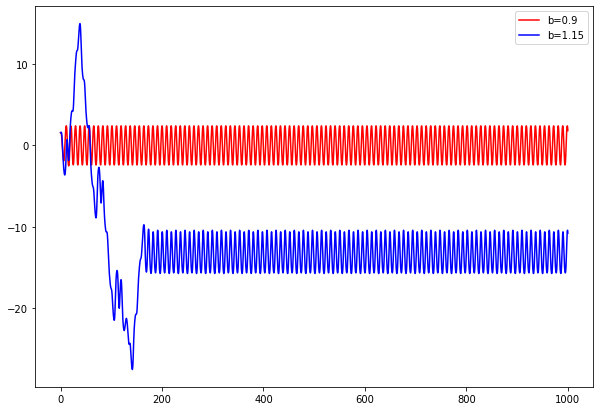

In [8]:
# plotando o gráfico
seconds = np.linspace(0, 200, N)
plt.figure(figsize=(10,7))
plt.plot(firstsol.t, firstsol.y[0], '-r', label='b=0.9')
plt.plot(secondsol.t, secondsol.y[0], '-b', label='b=1.15')
plt.legend()
plt.show()

[]

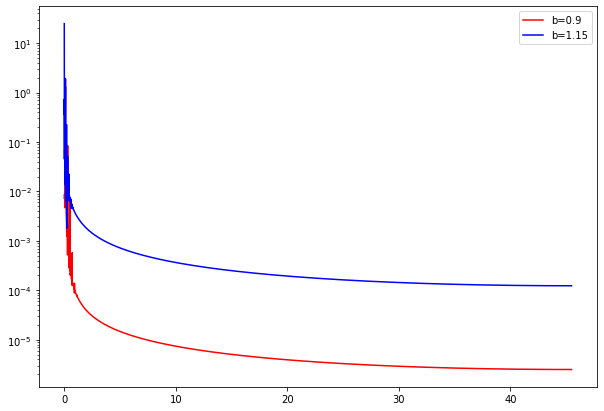

In [9]:
# realizando uma Transformada Rápida de Fourier para os dois valores de b 
# a fim de visualizar as frequências dominantes 
fft1 = fft(firstsol.y[0])[:N//2]
cn1 = 2*np.abs(fft1)/N                

fft2 = fft(secondsol.y[0])[:N//2]
cn2 = 2*np.abs(fft2)/N 

v = np.linspace (0, 1/(2*dt), N//2)
v0 = w0/2*np.pi

plt.figure(figsize=(10,7))
plt.plot(v/v0, cn1, '-r', label='b=0.9')
plt.plot(v/v0, cn2, '-b', label='b=1.15')
plt.legend()
plt.semilogy() # plota escalando o eixo y